### Import Library

In [1]:
%matplotlib inline

import numpy as np
import scipy as sp
import pandas as pd
import sklearn
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn import cross_validation
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from prettytable import PrettyTable
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor

/Users/tong/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Load Data

In [2]:
df = pd.read_csv("./dataset/winequality-white.csv", sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Separate the dataset into **feature matrix X** & **respoinse vector y**.

In [3]:
X_df = df.iloc[:,:-1]
X_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [4]:
X = X_df.as_matrix()
y_df = df["quality"].values
print(y_df[:10])

[6 6 6 6 6 6 6 6 6 6]


### Data Preview

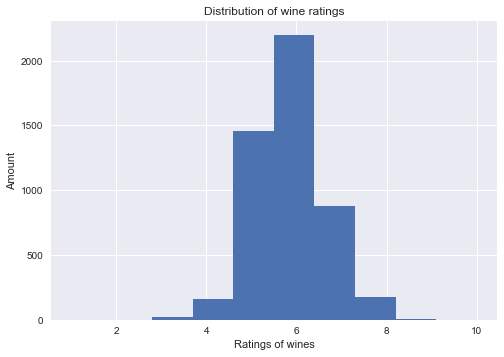

In [5]:
plt.hist(y_df, range=(1, 10))

plt.xlabel('Ratings of wines')
plt.ylabel('Amount')
plt.title('Distribution of wine ratings')
plt.show()

In [6]:
# sklearn can only deal with numpy arrys
Y = np.array([1 if i>=7 else 0 for i in y_df])


### Random Forest Classifier Construction



In [7]:
#Split set into test and train
# X_test=[]
# X_train=[]
# Y_test=[]
# Y_train=[]

# X_test=[X[i] for i in range(int(0.2*len(X)))]
# X_train=[X[i] for i in range(int(0.2*len(X)),len(X))]
# Y_test=[Y[i] for i in range(int(0.2*len(Y)))]
# Y_train=[Y[i] for i in range(int(0.2*len(Y)),len(Y))]

X_training, X_test, Y_training, Y_test = train_test_split(X, Y, test_size=0.2, random_state=20)
X_train, X_val, Y_train, Y_val = train_test_split(X_training, Y_training, test_size=0.2, random_state=20)

In [8]:
sm = SMOTE(random_state=20, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(X_train, Y_train)

/Users/tong/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [12]:
#5-fold cross validation

x=x_train_res
y=y_train_res


fold=1
kf = KFold(n_splits=5)
kf.get_n_splits(x)
for train_index, test_index in kf.split(x):
    x_trainset, x_testset = x[train_index], x[test_index]
    y_trainset, y_testset = y[train_index], y[test_index]

    #number of trees
    for num_trees in range(1,21):
        cv_scores=[]
        score=0.0
        
        #internal loop
        model = RandomForestClassifier(n_estimators = num_trees)
        scores=cross_val_score(model, x_trainset, y_trainset, cv=5,scoring='accuracy')
        
        est_model=RandomForestClassifier(n_estimators = num_trees)
        est_model.fit(x_trainset, y_trainset)
        test_error=0.0
        for n in range(len(x_testset)):
            test_error+=(est_model.predict(x_testset[n].reshape(1,11))-y_testset[n])**2
        test_error/=len(x_testset)
        print ('fold=%d, #trees=%d, score=%.4f, test_error=%.4f')%(fold, num_trees, scores.mean(), test_error )
    fold+=1


fold=1, #trees=1, score=0.7948, test_error=0.2342
fold=1, #trees=2, score=0.7892, test_error=0.1718
fold=1, #trees=3, score=0.8288, test_error=0.2157
fold=1, #trees=4, score=0.8375, test_error=0.1462
fold=1, #trees=5, score=0.8475, test_error=0.1820
fold=1, #trees=6, score=0.8554, test_error=0.1544
fold=1, #trees=7, score=0.8580, test_error=0.1748
fold=1, #trees=8, score=0.8613, test_error=0.1452
fold=1, #trees=9, score=0.8657, test_error=0.1636
fold=1, #trees=10, score=0.8739, test_error=0.1544
fold=1, #trees=11, score=0.8726, test_error=0.1667
fold=1, #trees=12, score=0.8723, test_error=0.1544
fold=1, #trees=13, score=0.8736, test_error=0.1554
fold=1, #trees=14, score=0.8744, test_error=0.1493
fold=1, #trees=15, score=0.8764, test_error=0.1656
fold=1, #trees=16, score=0.8820, test_error=0.1421
fold=1, #trees=17, score=0.8759, test_error=0.1513
fold=1, #trees=18, score=0.8764, test_error=0.1503
fold=1, #trees=19, score=0.8764, test_error=0.1513
fold=1, #trees=20, score=0.8785, test_er

In [13]:
clf_rf = RandomForestClassifier(n_estimators=18, random_state=20)
clf_rf.fit(X_train, Y_train)

print ('Validation Results')
print ('Accuracy')
print (clf_rf.score(X_val, Y_val))
print ('Recall')
print (recall_score(Y_val, clf_rf.predict(X_val)))
print ('\nTest Results')
print ('Accuracy')
print (clf_rf.score(X_test, Y_test))
print ('Recall')
print (recall_score(Y_test, clf_rf.predict(X_test)))

Validation Results
Accuracy
0.878826530612
Recall
0.588235294118

Test Results
Accuracy
0.876530612245
Recall
0.522613065327


[]

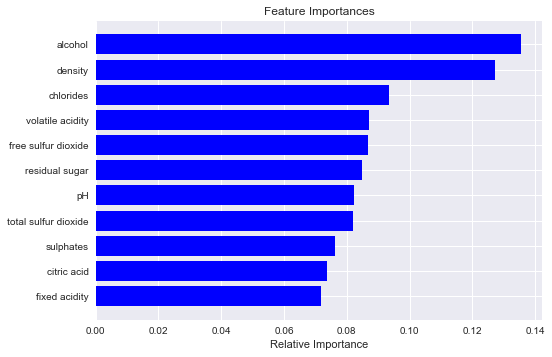

In [14]:
#feature selection
model=RandomForestClassifier(n_estimators=18)
model.fit(X_train,Y_train)

features = df.columns[0:12]
importances = model.feature_importances_
indices = np.argsort(importances)
 
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.plot()

In [15]:
df = pd.read_csv("./dataset/winequality-white.csv", sep=';')
df.head()

Selected_Features=df.columns[[1,2,3,4,5,6,7,8,9,10]]
X_df = df[Selected_Features]
X_df.head()
X = X_df.as_matrix()

y_df = df["quality"].values
print(y_df[:10]) 
Y = np.array([1 if i>=7 else 0 for i in y_df])


X_training, X_test, Y_training, Y_test = train_test_split(X, Y, test_size=0.2, random_state=20)
X_train, X_val, Y_train, Y_val = train_test_split(X_training, Y_training, test_size=0.2, random_state=20)

sm = SMOTE(random_state=20, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(X_train, Y_train)

[6 6 6 6 6 6 6 6 6 6]


/Users/tong/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [16]:
clf_rf = RandomForestClassifier(n_estimators=18, random_state=20)
clf_rf.fit(X_train, Y_train)

print ('Validation Results')
print ('Accuracy')
print (clf_rf.score(X_val, Y_val))
print ('Recall')
print (recall_score(Y_val, clf_rf.predict(X_val)))
print ('\nTest Results')
print ('Accuracy')
print (clf_rf.score(X_test, Y_test))
print ('Recall')
print (recall_score(Y_test, clf_rf.predict(X_test)))

Validation Results
Accuracy
0.882653061224
Recall
0.576470588235

Test Results
Accuracy
0.880612244898
Recall
0.532663316583
